# Лабораторна робота #2Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

## Завдання роботи
1. Зниження розмірності і візуалізація даних.
Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

2. Кластерний аналіз
За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.

3. Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 

## Хід роботи

Датасет Лабораторної 1 - https://www.kaggle.com/datasets/erdemtaha/cancer-data.

In [58]:
import pandas as pd

data = pd.read_csv('data/Cancer_Data.csv', delimiter=',')

In [59]:
print("Column Names:")
print(data.columns.tolist())
print("\nDataset Size:")
print(data.shape)

Column Names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Dataset Size:
(569, 33)


In [60]:
from sklearn.preprocessing import StandardScaler

data["diagnosis"] = data["diagnosis"].replace({"B": 0, "M": 1})
print("Surv_status: \n0 = Benign cancer \n1 = Malignant cancer\n")
data = data.drop(columns=['id', "Unnamed: 32"])

y_column = 'diagnosis'

numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features] = data[numeric_features].apply(pd.to_numeric, errors='coerce')

# Removing outliers using z-score method outliers may deform clusters) 8,10 gives good data look
for i in numeric_features:
    mean_value = data[i].mean()
    std_dev = data[i].std()
    lower_bound = mean_value - 10 * std_dev
    upper_bound = mean_value + 10 * std_dev
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]

# Scaling numeric features
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

data[y_column] = data[y_column].astype(int)

X = data.drop(y_column, axis=1)
print(X)

Surv_status: 
0 = Benign cancer 
1 = Malignant cancer

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.137721     -2.073379        1.316619   1.051840         1.573525   
1       1.889764     -0.352886        1.743936   2.022988        -0.821811   
2       1.633253      0.457306        1.621241   1.655445         0.947293   
3      -0.777364      0.254758       -0.596575  -0.785572         3.288545   
4       1.808147     -1.151437        1.837014   1.936331         0.285480   
..           ...           ...             ...        ...              ...   
564     2.178338      0.722714        2.128944   2.480174         1.046921   
565     1.761509      2.087002        1.672011   1.828758         0.107574   
566     0.732551      2.047424        0.703145   0.624834        -0.835332   
567     1.898509      2.338441        2.048557   1.840711         1.530827   
568    -1.844215      1.223263       -1.851447  -1.398441        -3.106844   

     com

C:\Users\user\AppData\Local\Temp\ipykernel_3688\3723964999.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnosis"] = data["diagnosis"].replace({"B": 0, "M": 1})


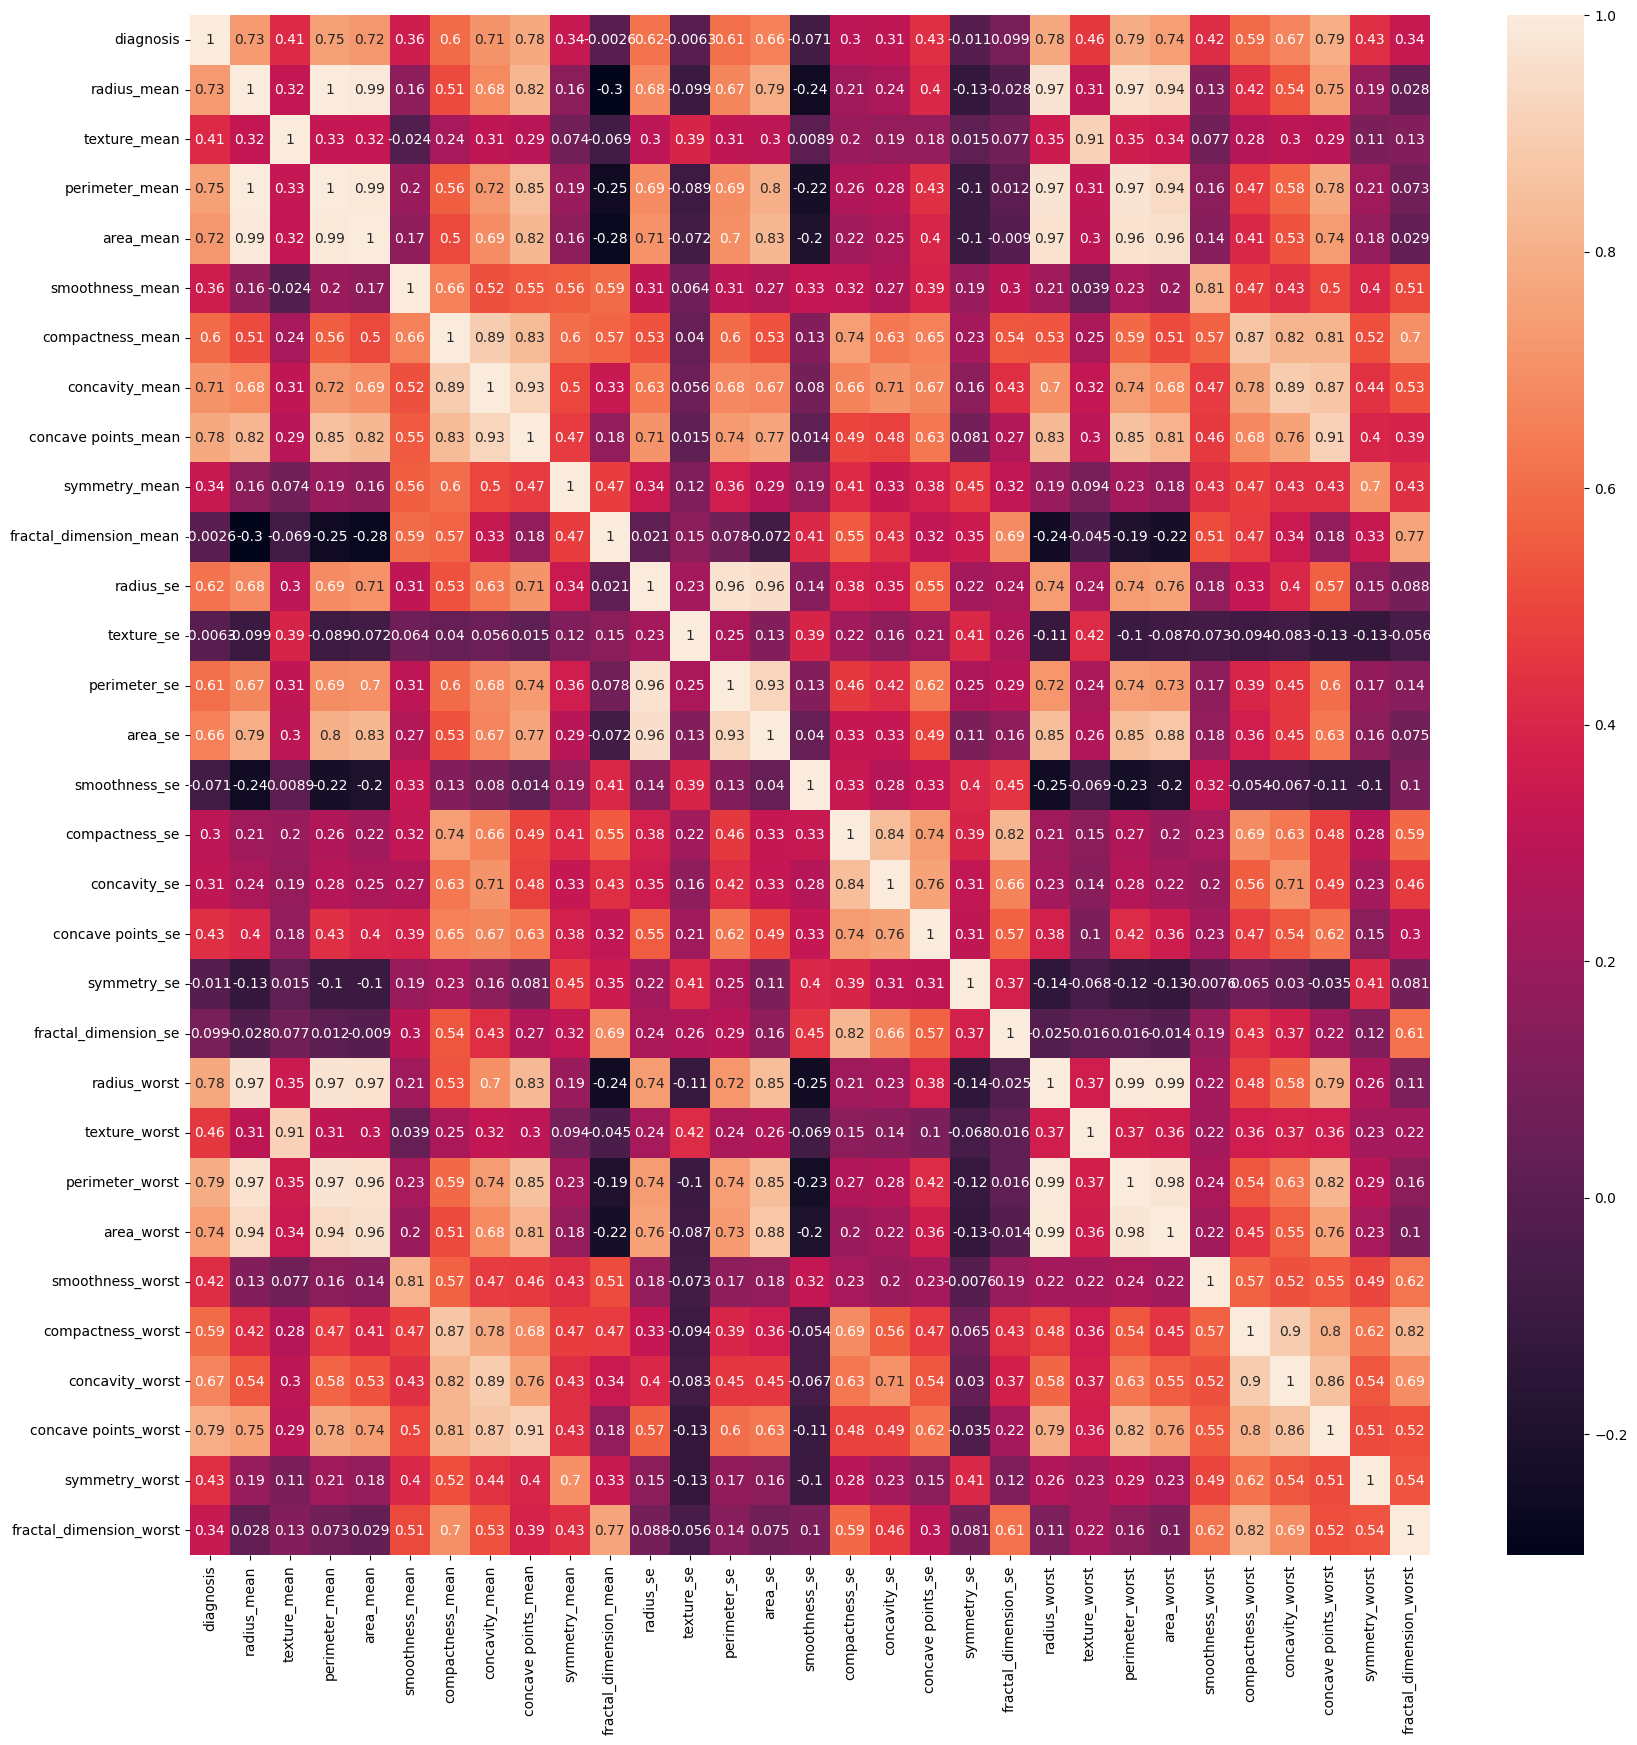

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Зниження розмірності і візуалізація даних

### Principal Component Analysis

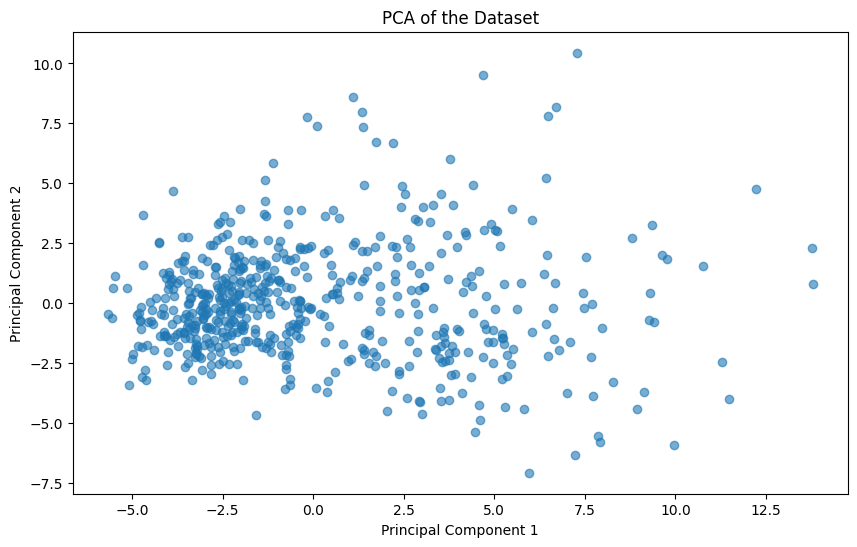

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
pca_dataframe = pd.DataFrame(data=X_2d, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_dataframe['PC1'], pca_dataframe['PC2'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset')
plt.show()

### TSNE

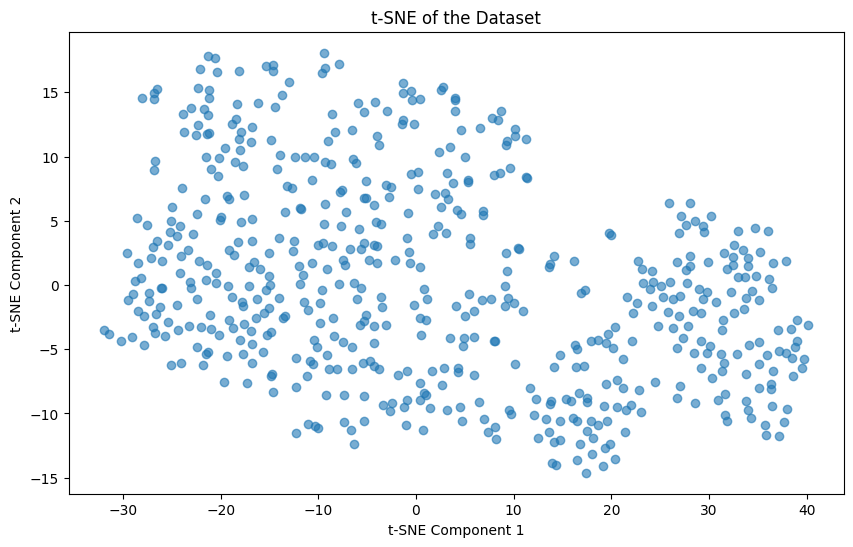

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_2d_tsne = tsne.fit_transform(X)
tsne_dataframe = pd.DataFrame(data=X_2d_tsne, columns=['t-SNE 1', 't-SNE 2'])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_dataframe['t-SNE 1'], tsne_dataframe['t-SNE 2'], alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of the Dataset')
plt.show()


## Кластерний аналіз

Розглянемо кластерний аналіз на прикладі 2 зображень.

In [64]:
from PIL import Image

image = Image.open('data/main_street.jpg')
print(f'Image mode: {image.mode}')

Image mode: RGB


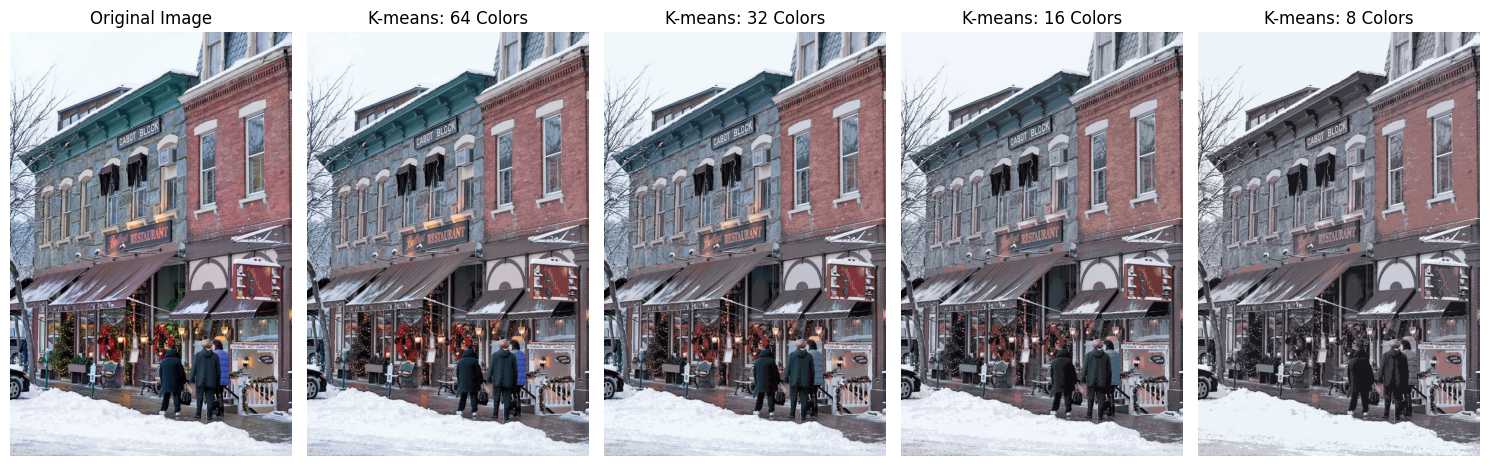

In [65]:
import numpy as np
from sklearn.cluster import KMeans

image_path = 'data/main_street.jpg'
image = Image.open(image_path)
image = image.convert('RGB')

image_np = np.array(image)
pixels = image_np.reshape(-1, 3)

def quantize_image(pixels, n_colors):
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    labels = kmeans.fit_predict(pixels)
    quantized_pixels = kmeans.cluster_centers_[labels].reshape(image_np.shape)
    return quantized_pixels.astype(np.uint8)

color_levels = [64, 32, 16, 8]

plt.figure(figsize=(15, 10))

plt.subplot(2, len(color_levels) + 1, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

for i, n_colors in enumerate(color_levels):
    quantized_image = quantize_image(pixels, n_colors)
    
    plt.subplot(2, len(color_levels) + 1, i + 2)
    plt.imshow(quantized_image)
    plt.title(f'K-means: {n_colors} Colors')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [66]:
image = Image.open('data/kawaguchi.jpg')

print(f'Image mode: {image.mode}')

Image mode: RGB


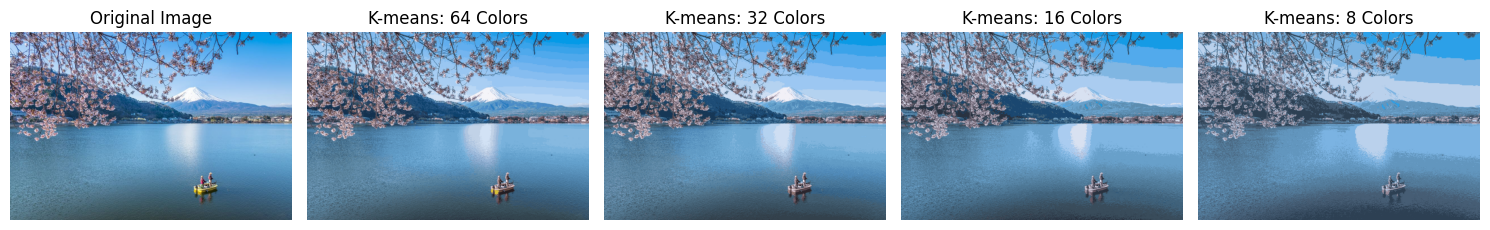

In [67]:
image_path = 'data/kawaguchi.jpg'
image = Image.open(image_path)
image = image.convert('RGB')

image_np = np.array(image)
pixels = image_np.reshape(-1, 3)

def quantize_image(pixels, n_colors):
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    labels = kmeans.fit_predict(pixels)
    quantized_pixels = kmeans.cluster_centers_[labels].reshape(image_np.shape)
    return quantized_pixels.astype(np.uint8)

color_levels = [64, 32, 16, 8]

plt.figure(figsize=(15, 10))

plt.subplot(2, len(color_levels) + 1, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

for i, n_colors in enumerate(color_levels):
    quantized_image = quantize_image(pixels, n_colors)
    
    plt.subplot(2, len(color_levels) + 1, i + 2)
    plt.imshow(quantized_image)
    plt.title(f'K-means: {n_colors} Colors')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Обробка та класифікація текстових даних

Датасет - https://www.yelp.com/dataset

In [68]:
import pandas as pd

# Dataset is 8+ Gb in size, pretty hard to load
data = pd.read_json('data/yelp_academic_dataset_review.json', lines=True, nrows=90000)

In [69]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
def preprocess(text, custom_stopwords=None):
    if custom_stopwords is None:
        custom_stopwords = set()
    else:
        custom_stopwords = set(custom_stopwords)

    # Combine NLTK stopwords with custom stopwords
    all_stopwords = stop_words.union(custom_stopwords)

    # Tokenize, remove stopwords and punctuation
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in all_stopwords]
    return ' '.join(tokens)

In [71]:
custom_stopwords = ['place', 'one', 'got', 'food', 'drink', 'good', 'restaurant', 'said', 'even', 'told', 'order', 'ordered',
                    'really', 'table', 'thing', 'though', 'think', 'menu', 'came', 'go', 'went', 'location', 'pizza', 'time',
                    'ask', 'asked', 'people', 'always', 'know', 'still', 'u', 'two', 'three', 'us', 'way', 'service', 'make',
                   'going', 'first', 'second', 'third']
data['cleaned_text'] = data['text'].apply(lambda x: preprocess(x, custom_stopwords))

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

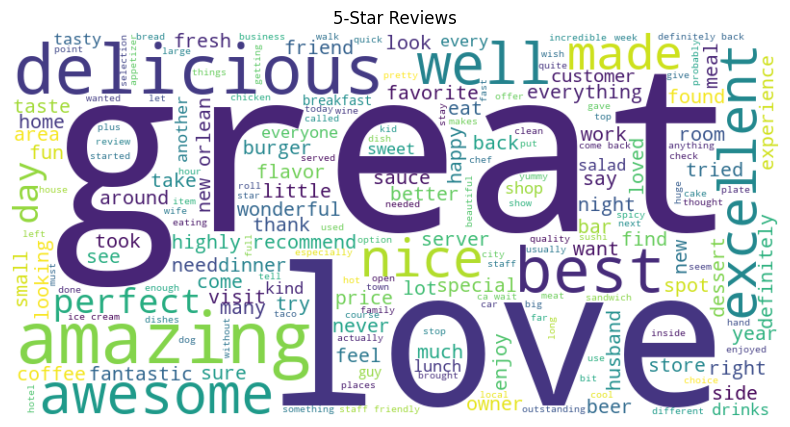

In [73]:
plot_wordcloud(' '.join(data[data['stars'] == 5]['cleaned_text']), '5-Star Reviews')

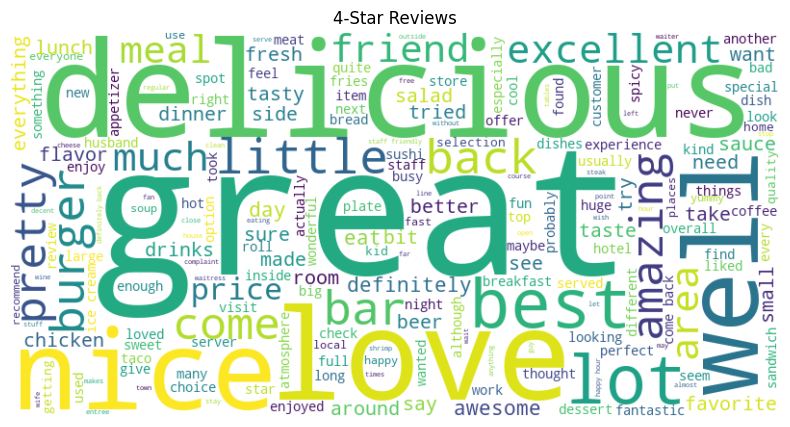

In [74]:
plot_wordcloud(' '.join(data[data['stars'] == 4]['cleaned_text']), '4-Star Reviews')

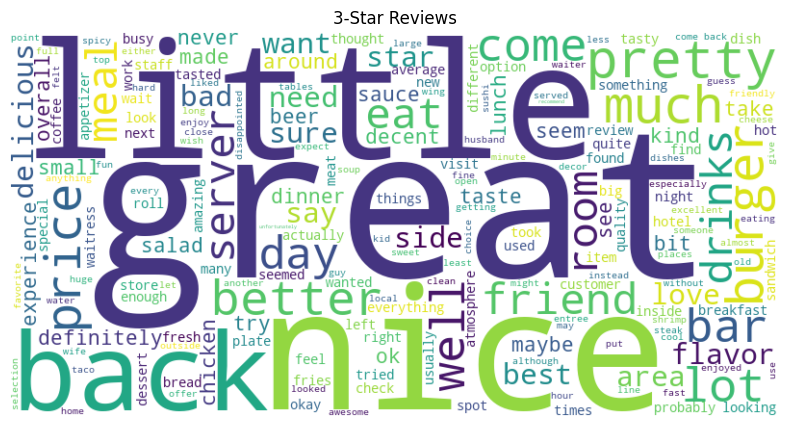

In [75]:
plot_wordcloud(' '.join(data[data['stars'] == 3]['cleaned_text']), '3-Star Reviews')

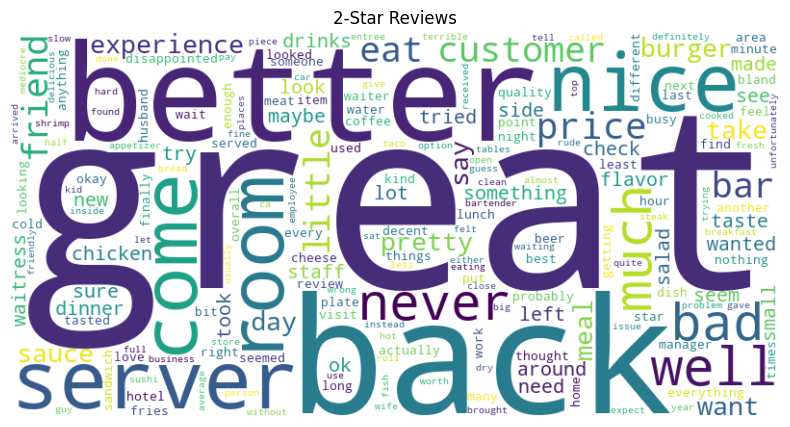

In [76]:
plot_wordcloud(' '.join(data[data['stars'] == 2]['cleaned_text']), '2-Star Reviews')

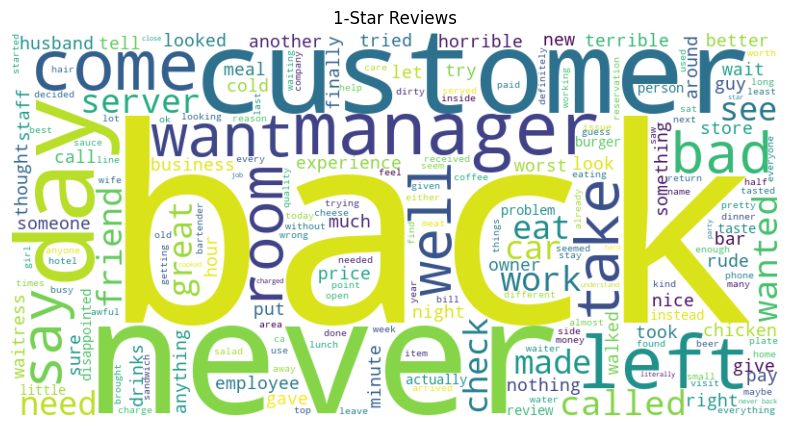

In [77]:
plot_wordcloud(' '.join(data[data['stars'] == 1]['cleaned_text']), '1-Star Reviews')

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['stars']

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

model = LogisticRegression(max_iter=500)  # after 500 iterations NO accuracy changes observed
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           1       0.69      0.73      0.71      1978
           2       0.43      0.29      0.35      1409
           3       0.43      0.33      0.38      1965
           4       0.51      0.45      0.48      4579
           5       0.73      0.84      0.78      8069

    accuracy                           0.63     18000
   macro avg       0.56      0.53      0.54     18000
weighted avg       0.61      0.63      0.62     18000

Accuracy: 0.6326111111111111
